<a href="https://colab.research.google.com/github/kusandriadi/diabates-classification-using-svm/blob/main/klasifikasi_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [521]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

%matplotlib inline

In [522]:
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/
df = pd.read_csv("diabetes2.csv")

# Map hasil diagnosa jika belum ada label nya, dalam kasus ini kita skip karena sudah ada kolom outcome.
# df['Outcome'] = df['Outcome'].map({
#     'X': 1,
#     'XX': 0
# })
# labels = df['Outcome'].tolist()

#Buat kolom baru darir hasil map di atas
#df['Class'] = labels

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [523]:
#perbandingan diabetes dan non-diabetes
df['Outcome'].value_counts()/float(len(df))

#0 non-diabetes 65.1%
#1 diabetes 34.8%
#data tidak seimbang, tapi masih bisa ditolerir
#source: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [524]:
#apakah ada yang kosong?
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [525]:
#filter hanya untuk yang umurnya antara 40 dan 60 tahun.
#df=df[(df['Age'] >= 40) & (df['Age'] <= 60)]

In [526]:
#perlihatkan dimensi data sebelum kolom hasil dihilangkan
df.shape

(768, 9)

In [527]:
#Drop kolom 'Outcome' jika diperlukan
y=df["Outcome"]
X=df.drop(columns="Outcome",axis=1)

#perlihatkan dimensi data setelah kolom hasil dihilangkan
#df.shape

In [528]:
#Tampilkan 5 baris
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [529]:
#split X dan y (test size 20%)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y, random_state=0)

In [530]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [531]:
cols = X_train.columns

In [532]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,614.000000,6.140000e+02,6.140000e+02
mean,-3.905671e-17,1.591199e-16,1.518872e-16,4.339634e-17,6.075488e-17,0.000000,5.207561e-17,2.256610e-16
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815,1.000815e+00,1.000815e+00
min,-1.161669e+00,-3.784484e+00,-3.599424e+00,-1.263502e+00,-6.596596e-01,-4.150009,-1.170105e+00,-1.057582e+00
25%,-8.699453e-01,-6.484957e-01,-2.866320e-01,-1.263502e+00,-6.596596e-01,-0.603974,-6.916455e-01,-8.049477e-01
50%,-2.864975e-01,-1.153778e-01,1.274669e-01,1.483650e-01,-6.596596e-01,0.000021,-3.024397e-01,-2.996781e-01
75%,5.886740e-01,5.980594e-01,5.415659e-01,7.622203e-01,4.162136e-01,0.565049,4.101288e-01,6.266495e-01
max,3.797636e+00,2.456132e+00,2.715586e+00,4.813665e+00,6.800904e+00,4.565704,5.683428e+00,3.995113e+00


Text(0, 0.5, 'Age')

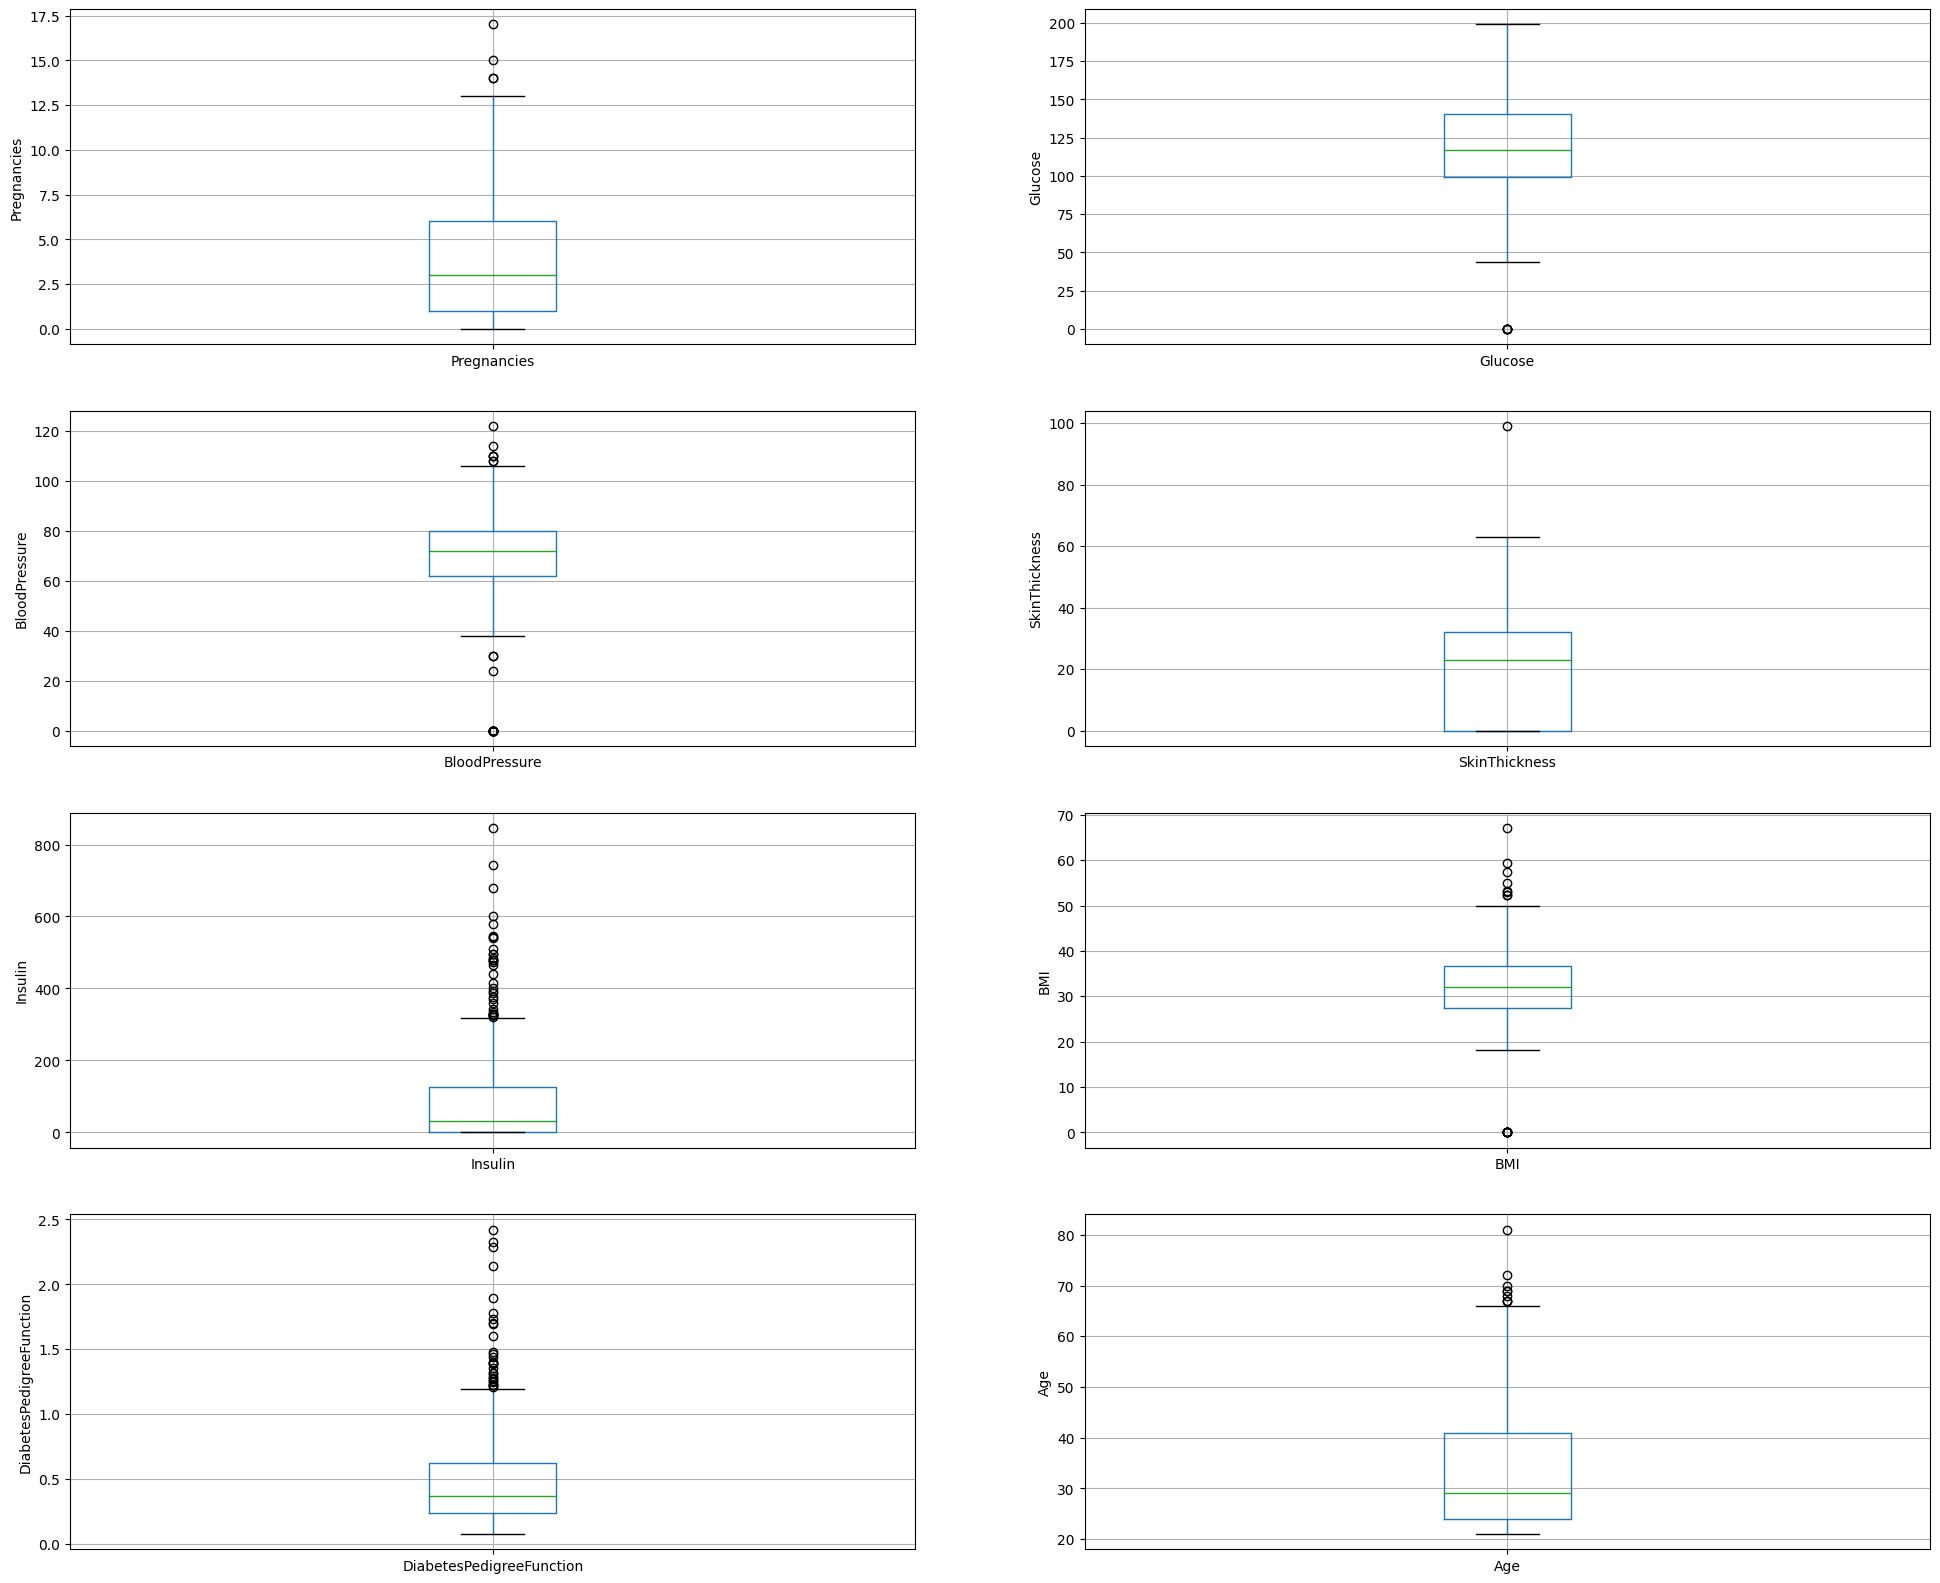

In [533]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='Pregnancies')
fig.set_title('')
fig.set_ylabel('Pregnancies')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='Glucose')
fig.set_title('')
fig.set_ylabel('Glucose')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='BloodPressure')
fig.set_title('')
fig.set_ylabel('BloodPressure')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='SkinThickness')
fig.set_title('')
fig.set_ylabel('SkinThickness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='Insulin')
fig.set_title('')
fig.set_ylabel('Insulin')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='BMI')
fig.set_title('')
fig.set_ylabel('BMI')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DiabetesPedigreeFunction')
fig.set_title('')
fig.set_ylabel('DiabetesPedigreeFunction')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

# **RUN SVM - Hyperparameter**

In [534]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred_hyperparameter=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_hyperparameter)))

Model accuracy score with rbf kernel and C=100.0 : 0.7792


# **RUN SVM with Linear Kernel**

In [541]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0)


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_linier=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_linier)))

y_pred_train = linear_svc.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Model accuracy score with linear kernel and C=1.0 : 0.7792
Training-set accuracy score: 0.7801
Training set score: 0.7801
Test set score: 0.7792


# **RUN SVM with Polynomial Kernel**

In [548]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0)


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred_poly=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_poly)))

Model accuracy score with polynomial kernel and C=1.0 : 0.7727


# **RUN SVM with Sigmoid Kernel**

In [555]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_sigmoid=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_sigmoid)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.7532


# **Confusion Matrix**

===================== HyperParameter ===================== 
Confusion matrix

 [[87 13]
 [21 33]]

True Positives(TP) =  87

True Negatives(TN) =  33

False Positives(FP) =  13

False Negatives(FN) =  21
===================== Linier ===================== 
Confusion matrix

 [[89 11]
 [23 31]]

True Positives(TP) =  89

True Negatives(TN) =  31

False Positives(FP) =  11

False Negatives(FN) =  23
===================== Polynomial ===================== 
Confusion matrix

 [[87 13]
 [22 32]]

True Positives(TP) =  87

True Negatives(TN) =  32

False Positives(FP) =  13

False Negatives(FN) =  22
===================== Sigmoid ===================== 
Confusion matrix

 [[80 20]
 [18 36]]

True Positives(TP) =  80

True Negatives(TN) =  36

False Positives(FP) =  20

False Negatives(FN) =  18


<Axes: title={'center': 'sigmoid'}>

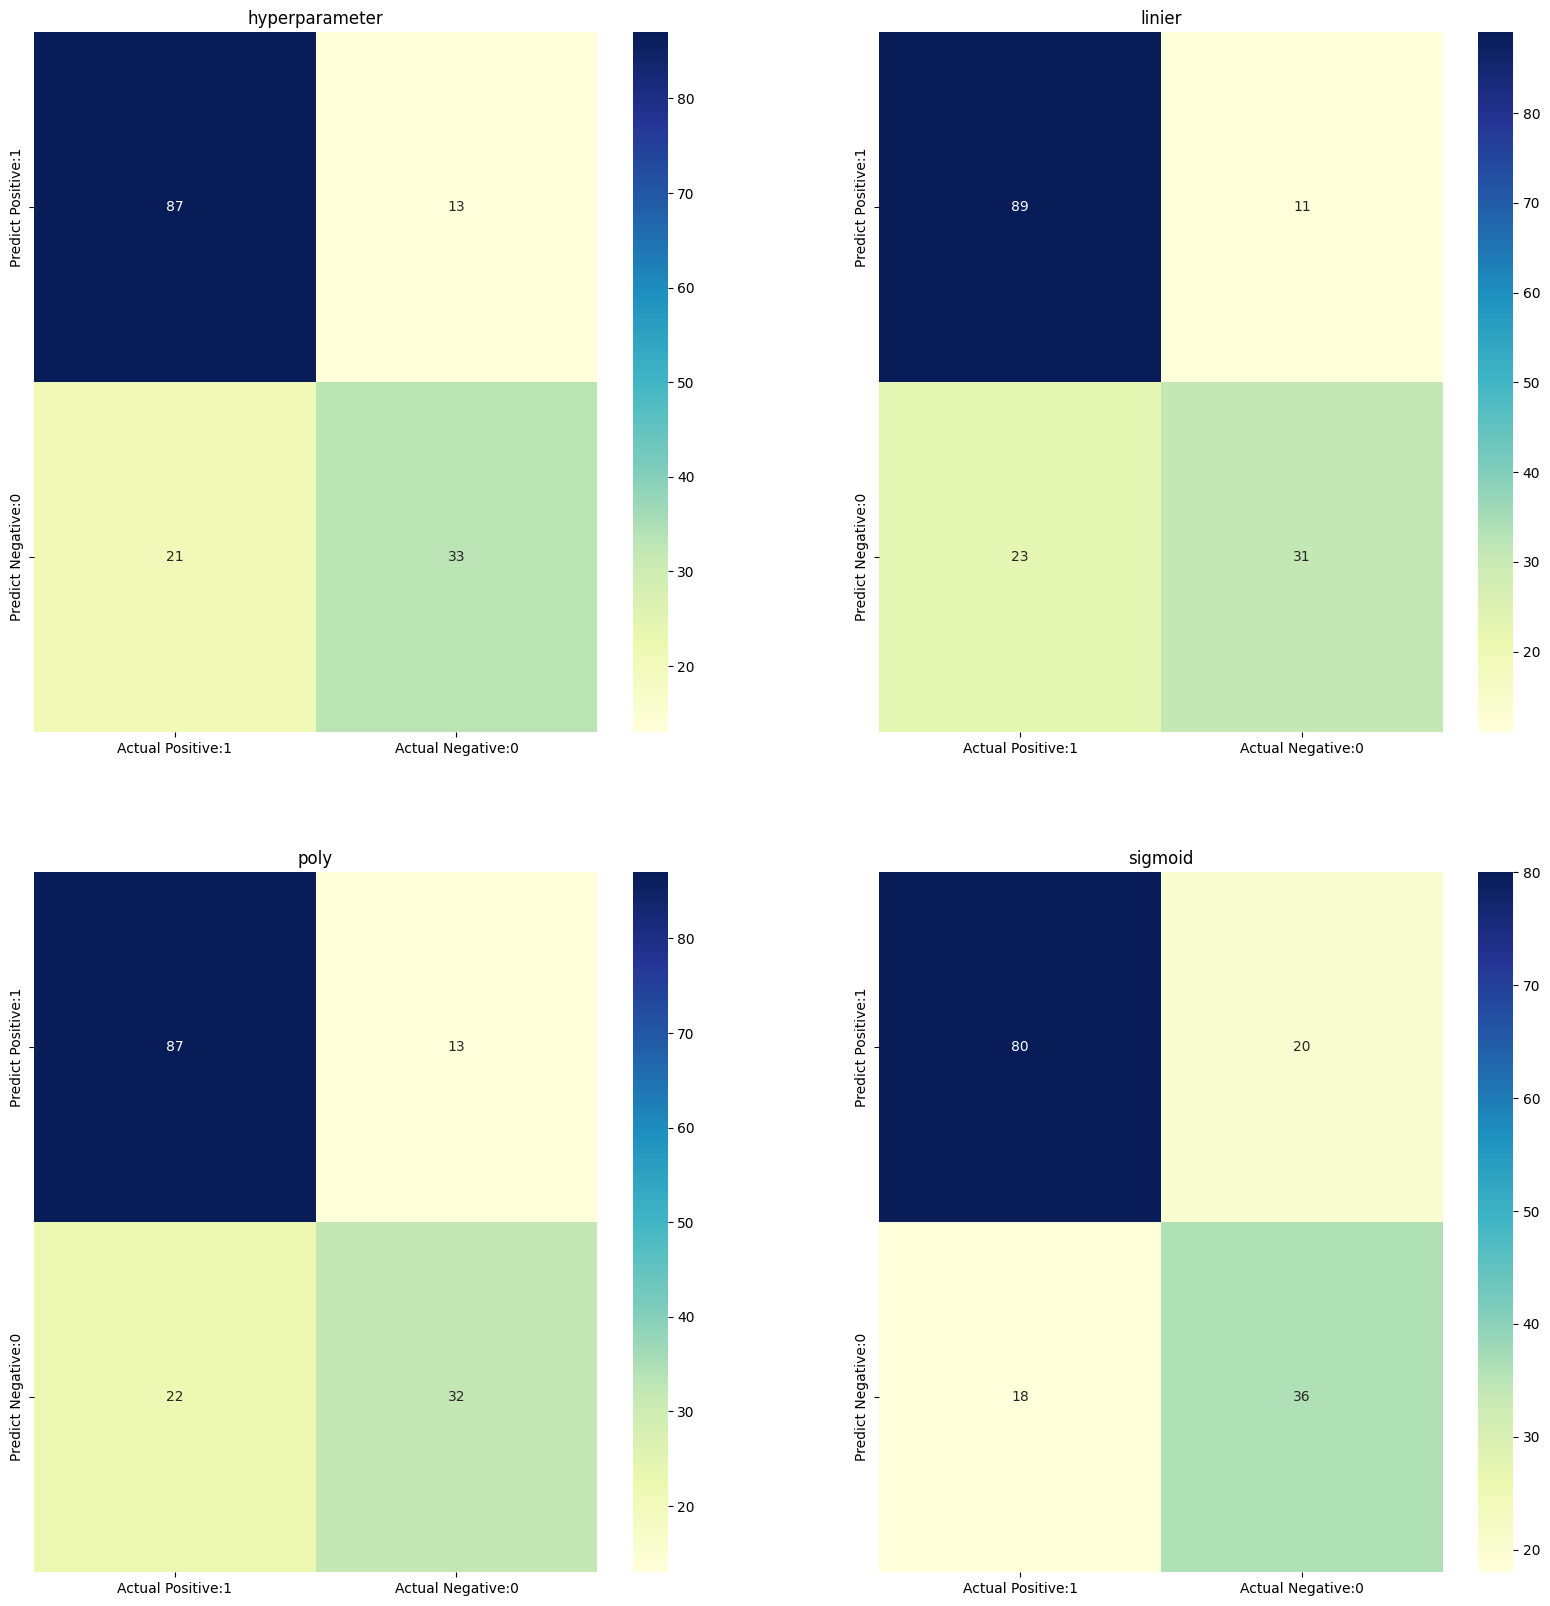

In [561]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(2, 2, 1) # row, column, position
ax1.set_title('hyperparameter')

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('linier')

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('poly')

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('sigmoid')

print("===================== HyperParameter ===================== ")
cm_hyperparameter = confusion_matrix(y_test, y_pred_hyperparameter)

print('Confusion matrix\n\n', cm_hyperparameter)

print('\nTrue Positives(TP) = ', cm_hyperparameter[0,0])

print('\nTrue Negatives(TN) = ', cm_hyperparameter[1,1])

print('\nFalse Positives(FP) = ', cm_hyperparameter[0,1])

print('\nFalse Negatives(FN) = ', cm_hyperparameter[1,0])
# visualize confusion matrix with seaborn heatmap
cm_matrix_hyperparameter = pd.DataFrame(data=cm_hyperparameter, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_hyperparameter, ax=ax1, annot=True, fmt='d', cmap='YlGnBu')
print("===================== Linier ===================== ")
cm_linier = confusion_matrix(y_test, y_pred_linier)

print('Confusion matrix\n\n', cm_linier)

print('\nTrue Positives(TP) = ', cm_linier[0,0])

print('\nTrue Negatives(TN) = ', cm_linier[1,1])

print('\nFalse Positives(FP) = ', cm_linier[0,1])

print('\nFalse Negatives(FN) = ', cm_linier[1,0])

# visualize confusion matrix with seaborn heatmap
cm_matrix_linier = pd.DataFrame(data=cm_linier, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_linier, ax=ax2, annot=True, fmt='d', cmap='YlGnBu')
print("===================== Polynomial ===================== ")
cm_poly = confusion_matrix(y_test, y_pred_poly)

print('Confusion matrix\n\n', cm_poly)

print('\nTrue Positives(TP) = ', cm_poly[0,0])

print('\nTrue Negatives(TN) = ', cm_poly[1,1])

print('\nFalse Positives(FP) = ', cm_poly[0,1])

print('\nFalse Negatives(FN) = ', cm_poly[1,0])
# visualize confusion matrix with seaborn heatmap
cm_matrix_poly = pd.DataFrame(data=cm_poly, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_poly, ax=ax3, annot=True, fmt='d', cmap='YlGnBu')
print("===================== Sigmoid ===================== ")
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)

print('Confusion matrix\n\n', cm_sigmoid)

print('\nTrue Positives(TP) = ', cm_sigmoid[0,0])

print('\nTrue Negatives(TN) = ', cm_sigmoid[1,1])

print('\nFalse Positives(FP) = ', cm_sigmoid[0,1])

print('\nFalse Negatives(FN) = ', cm_sigmoid[1,0])
cm_matrix_sigmoid = pd.DataFrame(data=cm_sigmoid, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_sigmoid, ax=ax4, annot=True, fmt='d', cmap='YlGnBu')

# **Classification Report**

In [562]:
print("===================== HyperParameter ===================== ")
print(classification_report(y_test, y_pred_hyperparameter))
print("===================== Linier ===================== ")
print(classification_report(y_test, y_pred_linier))
print("===================== Polynomial ===================== ")
print(classification_report(y_test, y_pred_poly))
print("===================== Sigmoid ===================== ")
print(classification_report(y_test, y_pred_sigmoid))

===================== HyperParameter ===================== 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154

===================== Linier ===================== 
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.74      0.57      0.65        54

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154

===================== Polynomial ===================== 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       100
           1       0.71      0.59      0.65        54

    accuracy  

# **Classification Accuracy and Error**

In [563]:
print("===================== HyperParameter ===================== ")
TP_hyperparameter = cm_hyperparameter[0,0]
TN_hyperparameter = cm_hyperparameter[1,1]
FP_hyperparameter = cm_hyperparameter[0,1]
FN_hyperparameter = cm_hyperparameter[1,0]

# print classification accuracy
classification_accuracy_hyperparameter = (TP_hyperparameter + TN_hyperparameter) / float(TP_hyperparameter + TN_hyperparameter + FP_hyperparameter + FN_hyperparameter)

print('Classification accuracy hyperparameter : {0:0.4f}'.format(classification_accuracy_hyperparameter))

# print classification error
classification_error_hyperparameter = (FP_hyperparameter + FN_hyperparameter) / float(TP_hyperparameter + TN_hyperparameter + FP_hyperparameter + FN_hyperparameter)
print('Classification error hyperparameter : {0:0.4f}'.format(classification_error_hyperparameter))

print("===================== Linier ===================== ")
TP_linier = cm_linier[0,0]
TN_linier = cm_linier[1,1]
FP_linier = cm_linier[0,1]
FN_linier = cm_linier[1,0]

# print classification accuracy
classification_accuracy_linier = (TP_linier + TN_linier) / float(TP_linier + TN_linier + FP_linier + FN_linier)
print('Classification accuracy linier : {0:0.4f}'.format(classification_accuracy_linier))

# print classification error
classification_error_linier = (FP_linier + FN_linier) / float(TP_linier + TN_linier + FP_linier + FN_linier)
print('Classification error linier : {0:0.4f}'.format(classification_error_linier))
print("===================== Polynomial ===================== ")
TP_poly = cm_poly[0,0]
TN_poly = cm_poly[1,1]
FP_poly = cm_poly[0,1]
FN_poly = cm_poly[1,0]

# print classification accuracy
classification_accuracy_poly = (TP_poly + TN_poly) / float(TP_poly + TN_poly + FP_poly + FN_poly)

print('Classification accuracy poly : {0:0.4f}'.format(classification_accuracy_poly))

# print classification error
classification_error_poly = (FP_poly + FN_poly) / float(TP_poly + TN_poly + FP_poly + FN_poly)
print('Classification error poly : {0:0.4f}'.format(classification_error_poly))

print("===================== Sigmoid ===================== ")
TP_sigmoid = cm_sigmoid[0,0]
TN_sigmoid = cm_sigmoid[1,1]
FP_sigmoid = cm_sigmoid[0,1]
FN_sigmoid = cm_sigmoid[1,0]

# print classification accuracy
classification_accuracy_sigmoid = (TP_sigmoid + TN_sigmoid) / float(TP_sigmoid + TN_sigmoid + FP_sigmoid + FN_sigmoid)

print('Classification accuracy poly : {0:0.4f}'.format(classification_accuracy_poly))

# print classification error
classification_error_sigmoid = (FP_sigmoid + FN_sigmoid) / float(TP_sigmoid + TN_sigmoid + FP_sigmoid + FN_sigmoid)
print('Classification error poly : {0:0.4f}'.format(classification_error_sigmoid))


===================== HyperParameter ===================== 
Classification accuracy hyperparameter : 0.7792
Classification error hyperparameter : 0.2208
===================== Linier ===================== 
Classification accuracy linier : 0.7792
Classification error linier : 0.2208
===================== Polynomial ===================== 
Classification accuracy poly : 0.7727
Classification error poly : 0.2273
===================== Sigmoid ===================== 
Classification accuracy poly : 0.7727
Classification error poly : 0.2468
